In [ ]:
# retina
%config InlineBackend.figure_format = 'retina'

In [11]:
import os
from pathlib import Path
import pickle
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.table import Table
import eazy

from matplotlib import rcParams
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 25

WD = Path('/data1/hbahk/spherex-photoz/spherex-challenge/challenge')
OUTDIR = WD / 'output'
os.chdir(WD)

from utils import plot_comp_hexbin

In [12]:
# make the master output table
base = Table.read(WD/'data/fiducial102_reduced.fits')

base['z_true'] = base['z_true'][:,0]
base['HSC_i_MAG'] = base['HSC_i_MAG'][:,0]

base[:5]

source_id,x,y,HSC_i_MAG,z_true,FLAG_ML
int64,float64,float64,float64[1],float64[1],float64
180642,0.0,0.0,23.561245805944896,0.7599,0.0
180650,0.0,0.0,22.238483110379896,0.7945,0.0
180651,0.0,0.0,24.799673329369853,0.8346,0.0
180654,0.0,0.0,24.236406897361483,1.3229,0.0
180657,0.0,0.0,24.744050892069353,2.5462,1.0


In [14]:
output1 = Table.read(OUTDIR/'output16.fits')
output1[:5]

id,nusefilt,z_ml,z_ml_chi2,z_ml_risk,lc_min,lc_max,z_phot,z_phot_chi2,z_phot_risk,z_min_risk,min_risk,z_raw_chi2,raw_chi2,z025,z160,z500,z840,z975,restU,restU_err,restB,restB_err,restV,restV_err,restJ,restJ_err,dL,mass,sfr,Lv,LIR,energy_abs,MLv,Av,mass_p,sfr_p,Lv_p,LIR_p,energy_abs_p,Av_p,ssfr_p,rest270,rest270_err,rest274,rest274_err,rest120,rest120_err,rest121,rest121_err,rest156,rest156_err,rest157,rest157_err,rest158,rest158_err,rest159,rest159_err,rest160,rest160_err,rest161,rest161_err,rest162,rest162_err,rest163,rest163_err,DISTMOD,ABSM_271,ABSM_272,ABSM_274
,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,solMass,solMass / yr,solLum,solLum,solLum,solMass / solLum,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,int64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64[5],float64[5],float64[5]
382728,204,3.4485006,160.37726,0.6455942,6909.0,49321.6,3.4485006,160.37726,0.6455942,3.1954474,0.63026243,3.4548795,160.4392,0.0497,0.5553,2.5515,3.7793,5.5227,0.970,0.310,1.748,0.524,2.013,0.601,1.234,0.631,3.0e+04,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.000 .. -900000000000000046043660025856.000,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.00 .. -900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,0.333,0.207,0.668,0.240,0.348,0.206,0.531,0.247,0.919,0.300,2.233,0.682,2.066,0.628,1.562,0.495,1.490,0.549,1.229,0.633,1.232,0.662,0.882,0.540,45.76785242909398,-- .. -21.69296992176976,-19.070665005387923 .. -21.88748896473851,-19.994218472184798 .. -21.98039973134007
382733,204,0.9782484,181.4492,0.6636297,6909.0,49321.6,0.9782484,181.4492,0.6636297,0.9758526,0.6636245,0.9758526,181.4869,0.1856,0.9351,2.3114,4.8932,5.6099,2.400,0.840,2.519,0.790,2.241,0.677,1.098,0.404,6.4e+03,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.000 .. -900000000000000046043660025856.000,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.00 .. -900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,2.719,1.377,2.223,0.851,2.726,1.208,2.312,0.959,2.414,0.799,2.790,0.889,2.849,0.835,1.699,0.508,1.492,0.480,1.127,0.409,0.873,0.374,0.619,0.294,43.300340683266086,-18.255029709144992 .. -21.140882522865695,-18.32368663053171 .. -20.986104996010226,-18.598217041298312 .. -20.876367599769992
382741,204,0.7867471,189.7091,0.049745806,6909.0,49321.6,0.7867471,189.7091,0.049745806,0.8057933,0.046853192,0.7842533,189.7231,0.6910,0.7420,0.8014,0.8753,0.9013,3.105,0.218,10.143,0.476,20.687,0.762,56.844,1.255,4.9e+03,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.000 .. -900000000000000046043660025856.000,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.00 .. -900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,0.053,0.027,0.519,0.062,0.027,0.921,0.170,0.934,2.946,0.213,13.666,0.563,26.624,1.137,37.249,1.078,47.412,0.943,56.798,1.409,70.536,1.354,57.495,1.297,42.82768160354232,-- .. -19.784445824733723,-- .. -19.76095301162337,-17.92628199111556 .. -18.43414217483138
382746,204,3

In [18]:
colnames = ['z_phot', 'z_phot_chi2', 'z160', 'z840', 'id']
for label in colnames:
    base[label] = np.empty(len(base), dtype=float)

for i in range(17):
    start_id = i*10000
    end_id = (i+1)*10000 if i < 16 else len(base)
    
    outtab = Table.read(OUTDIR/f'output{i:02d}.fits')
    for label in colnames:
        base[label][start_id:end_id] = outtab[label]

In [20]:
base.write(OUTDIR/'result.fits', overwrite=True)

Objects : 164686
Outliers: 129458




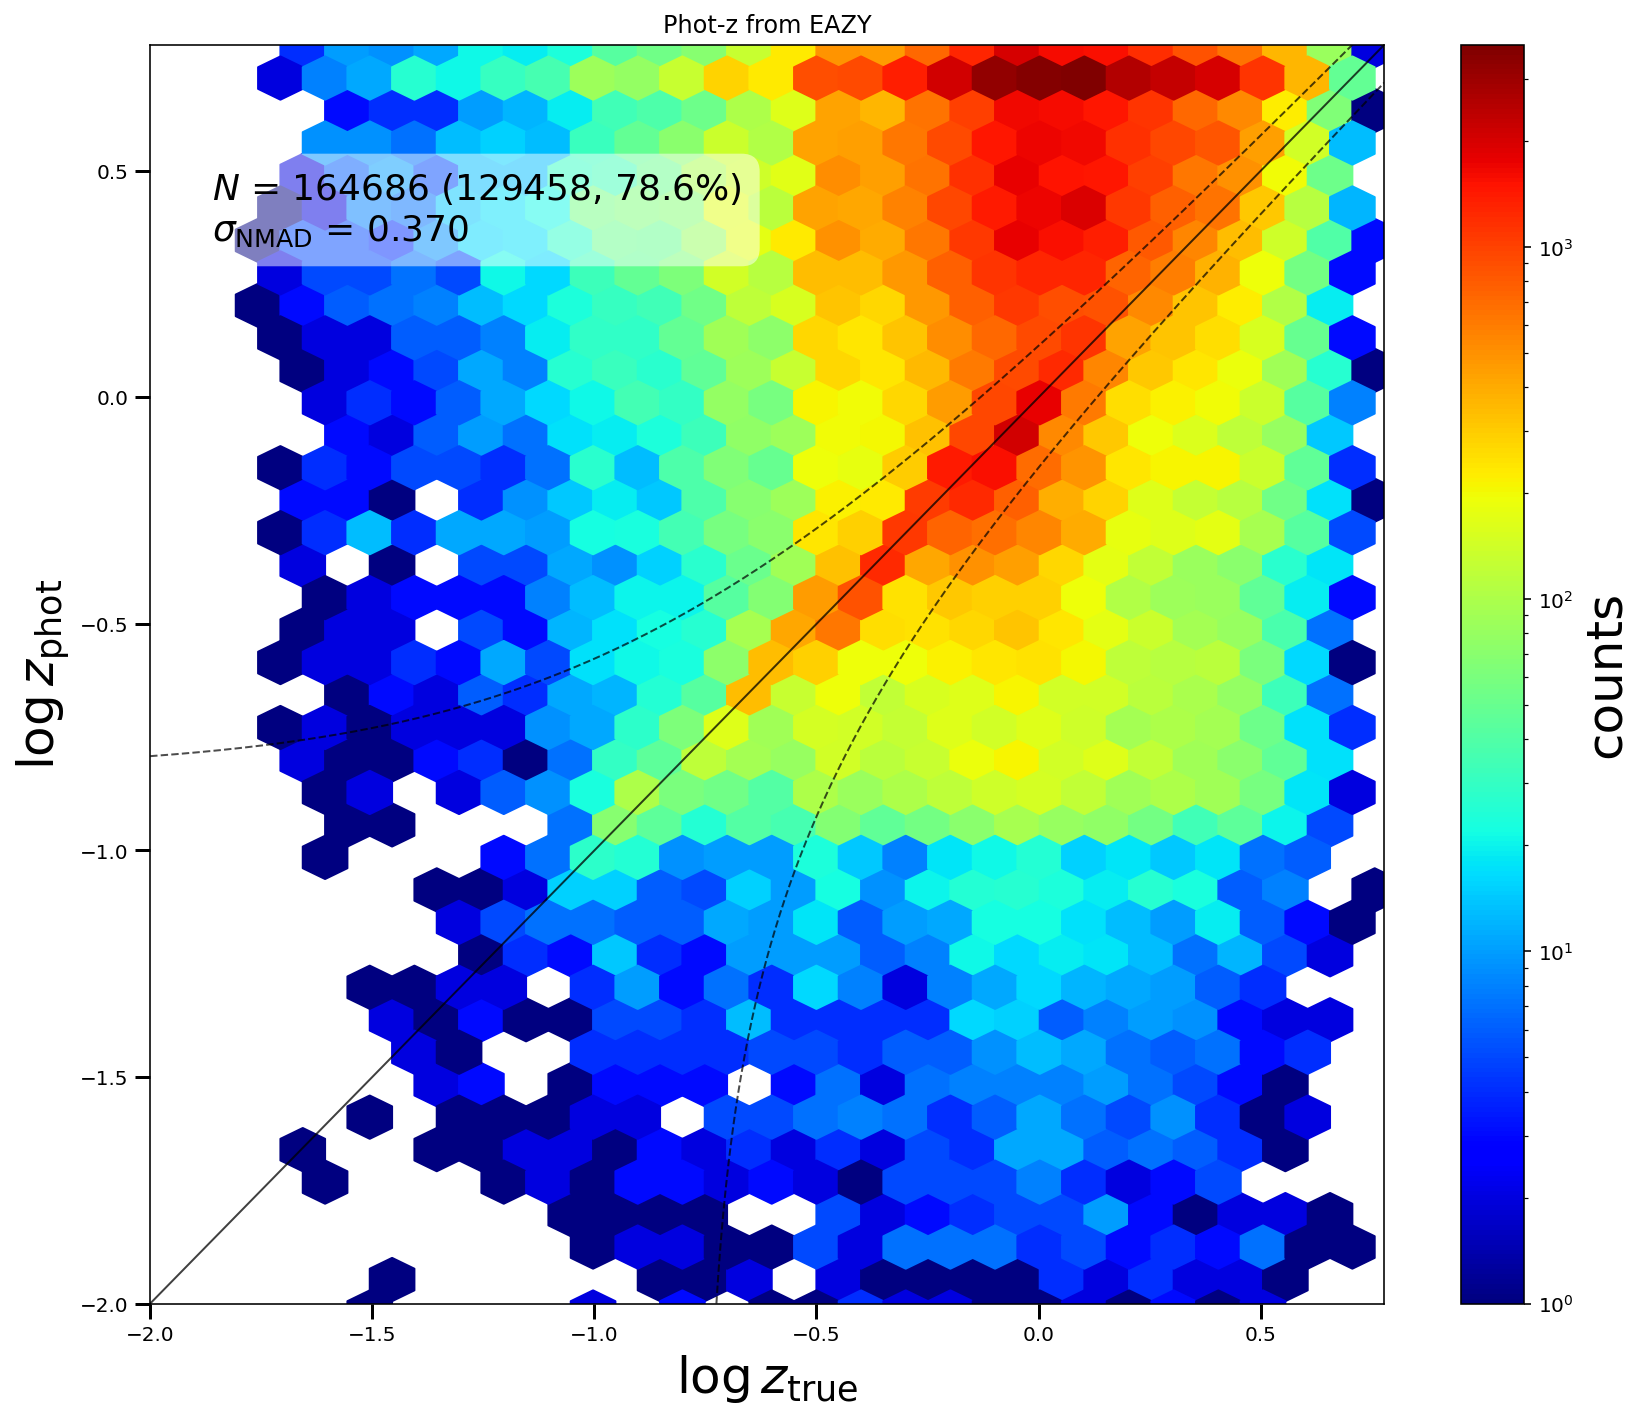

In [35]:

id_out = plot_comp_hexbin(base['z_true'], base['z_phot'], base['z_phot_chi2'],
                          'Fig1-comp_z_eazypy.png', base['id'],
                          label_x=r"$\log z_{\rm true}$", label_y=r"$\log z_{\rm phot}$",
                          title="Phot-z from EAZY", xmin=0.01, xmax=6.0, cmap='jet',
                          scatter_plot=False)